### Next we'll try working with KNN

# KNN

In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_fpflag_ec', 'koi_prad', 'koi_prad_err2']]
selected_features

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_fpflag_ec,koi_prad,koi_prad_err2
0,0,0,0,25.8,0,2.83,-0.19
1,0,0,1,76.3,0,14.60,-1.31
2,0,0,1,505.6,0,33.46,-2.83
3,0,0,0,40.9,0,2.75,-0.35
4,0,0,0,40.2,0,2.77,-0.30
...,...,...,...,...,...,...,...
6986,0,0,0,8.4,1,1.11,-0.23
6987,1,0,1,453.3,0,29.35,-2.57
6988,0,0,0,10.6,0,0.72,-0.08
6989,1,0,0,12.3,0,1.07,-0.11


In [4]:
X = selected_features
y = df["koi_disposition"]
target_names = df["koi_disposition"].unique()
print(X.shape, y.shape)

(6991, 7) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_fpflag_ec,koi_prad,koi_prad_err2
3563,0,0,0,11.7,0,3.89,-0.34
4099,0,0,0,18.0,0,2.10,-0.20
5460,0,0,0,476.0,0,14.59,-1.28
1091,0,0,0,34.7,0,2.28,-0.20
5999,0,0,0,8.7,0,2.27,-0.54


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.842
k: 3, Train/Test Score: 0.917/0.858
k: 5, Train/Test Score: 0.902/0.867
k: 7, Train/Test Score: 0.897/0.874
k: 9, Train/Test Score: 0.891/0.873
k: 11, Train/Test Score: 0.886/0.878
k: 13, Train/Test Score: 0.884/0.880
k: 15, Train/Test Score: 0.881/0.882
k: 17, Train/Test Score: 0.879/0.883
k: 19, Train/Test Score: 0.880/0.882


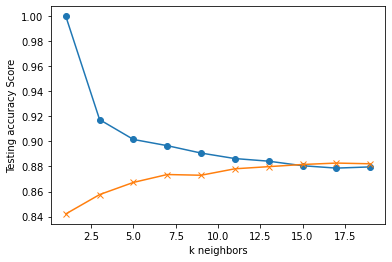

In [8]:
train_scores = []
test_scores = []

for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.883


### We got a score of .883 using a KNN model. 

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [31]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,9,31,51],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(knn, param_grid, verbose=1)

In [32]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.6s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 9, 31, 51],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [33]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 51, 'weights': 'uniform'}
0.876214169801847
KNeighborsClassifier(metric='euclidean', n_neighbors=51)


### Doing the GridSearch, it returns that the best "k" would be 51.

### Both scores are pretty similar either way.

In [36]:
predictions = grid.predict(X_test_scaled)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.65      0.74       404
     CONFIRMED       0.73      0.87      0.79       435
FALSE POSITIVE       0.99      1.00      0.99       909

      accuracy                           0.89      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.89      0.89      0.88      1748



# Save the Model

In [24]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Models\\KNN.sav'
joblib.dump(knn, filename)

['Models\\KNN.sav']